In [83]:
from sklearn.model_selection import cross_val_score, train_test_split, StratifiedShuffleSplit
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import RidgeClassifier
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils.extmath import density
from time import time
from sklearn import metrics

import matplotlib.pyplot as plt
%matplotlib inline

In [85]:
data = pd.read_csv('../data/features.csv')
data.head()

,jaccard_unigram_title,jaccard_unigram_desc,jaccard_bigram_title,jaccard_bigram_desc,edit_distance_title,edit_distance_desc,first_intersect_count_unigram,last_intersect_count_unigram,first_intersect_count_bigram,last_intersect_count_bigram,...,bullet_count,intersect_count,coccurence_count,doc2vec_rmse_title,doc2vec_rmse_desc,has_height,has_depth,has_length,has_width,is_relevant
0,0.000,0.0,0.0,0.0,0.839,0.985,0.0,0.5,0.0,0.0,...,0.467,0.500,0.083,0.008,0.005,1.0,1.0,0.0,1.0,1
1,0.000,0.0,0.0,0.0,0.903,0.989,0.0,0.0,0.0,0.0,...,0.467,0.000,0.000,0.010,0.007,1.0,1.0,0.0,1.0,1
2,0.000,0.0,0.0,0.0,0.892,0.992,0.0,0.0,0.0,0.0,...,0.286,0.000,0.000,0.006,0.004,1.0,1.0,0.0,1.0,1
3,0.067,0.0,0.0,0.0,0.797,0.977,0.0,0.0,0.0,0.0,...,0.160,0.333,0.026,0.004,0.004,1.0,1.0,0.0,1.0,1
4,0.143,0.0,0.0,0.0,0.754,0.974,0.0,0.0,0.0,0.0,...,0.160,0.667,0.051,0.002,0.004,1.0,1.0,0.0,1.0,1


In [88]:
t = data['is_relevant']
print t.value_counts()

print "Relevant class percentage:",
print float(t.value_counts()[1]) * 100 / (t.value_counts()[0] + t.value_counts()[1])

1    50428
0    23639
Name: is_relevant, dtype: int64
Relevant class percentage: 68.0843020508


In [90]:
X = data.ix[:,data.columns != 'is_relevant']
y = data['is_relevant']
stratified_split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 1)
X_train, y_train, X_test, y_test = None, None, None, None
for train_index, test_index in stratified_split.split(X, y):  
    X_train, y_train, X_test, y_test = X.iloc[train_index], y[train_index], X.iloc[test_index], y[test_index]
print X_train.shape, X_test.shape, X.shape

(59253, 24) (14814, 24) (74067, 24)


Ridge Classifier
________________________________________________________________________________
Training: 
RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
        max_iter=None, normalize=False, random_state=None, solver='lsqr',
        tol=0.01)
train time: 0.039s
test time:  0.001s
accuracy:   0.682
dimensionality: 24
density: 1.000000
confusion matrix:
[[ 692 4036]
 [ 681 9405]]
()
Perceptron
________________________________________________________________________________
Training: 
Perceptron(alpha=0.0001, class_weight=None, eta0=1.0, fit_intercept=True,
      n_iter=50, n_jobs=1, penalty=None, random_state=0, shuffle=True,
      verbose=0, warm_start=False)
train time: 0.442s
test time:  0.001s
accuracy:   0.605
dimensionality: 24
density: 0.958333
confusion matrix:
[[2844 1884]
 [3963 6123]]
()
Passive-Aggressive
________________________________________________________________________________
Training: 
PassiveAggressiveClassifier(C=1.0, class_wei

/home/rohan/anaconda2/lib/python2.7/site-packages/sklearn/svm/classes.py:199: DeprecationWarning: loss='l2' has been deprecated in favor of loss='squared_hinge' as of 0.16. Backward compatibility for the loss='l2' will be removed in 1.0
  DeprecationWarning)


train time: 1.311s
test time:  0.001s
accuracy:   0.694
dimensionality: 24
density: 1.000000
confusion matrix:
[[ 889 3839]
 [ 692 9394]]
()
________________________________________________________________________________
Training: 
SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=50, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=None, shuffle=True,
       verbose=0, warm_start=False)
train time: 0.596s
test time:  0.001s
accuracy:   0.678
dimensionality: 24
density: 1.000000
confusion matrix:
[[ 137 4591]
 [ 178 9908]]
()
L1 penalty
________________________________________________________________________________
Training: 
LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='l2', max_iter=1000, multi_class='ovr',
     penalty='l1', random_state=None, tol=0.001, verbose=0)


/home/rohan/anaconda2/lib/python2.7/site-packages/sklearn/svm/classes.py:199: DeprecationWarning: loss='l2' has been deprecated in favor of loss='squared_hinge' as of 0.16. Backward compatibility for the loss='l2' will be removed in 1.0
  DeprecationWarning)


train time: 3.270s
test time:  0.001s
accuracy:   0.694
dimensionality: 24
density: 0.916667
confusion matrix:
[[ 836 3892]
 [ 645 9441]]
()
________________________________________________________________________________
Training: 
SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=50, n_jobs=1,
       penalty='l1', power_t=0.5, random_state=None, shuffle=True,
       verbose=0, warm_start=False)
train time: 1.279s
test time:  0.001s
accuracy:   0.681
dimensionality: 24
density: 0.666667
confusion matrix:
[[    0  4728]
 [    0 10086]]
()
Elastic-Net penalty
________________________________________________________________________________
Training: 
SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=50, n_jobs=1,
       penalty='ela

/home/rohan/anaconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


train time: 21.327s
test time:  0.002s
accuracy:   0.692
confusion matrix:
[[ 973 3755]
 [ 806 9280]]
()


/home/rohan/anaconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


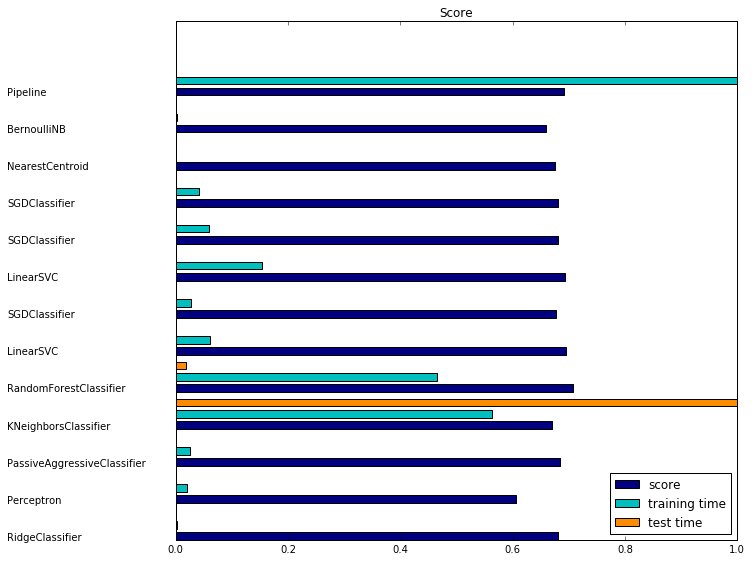

In [91]:
###############################################################################
# Benchmark classifiers
def benchmark(clf):
    print('_' * 80)
    print("Training: ")
    print(clf)
    t0 = time()
    clf.fit(X_train, y_train)
    train_time = time() - t0
    print("train time: %0.3fs" % train_time)

    t0 = time()
    pred = clf.predict(X_test)
    test_time = time() - t0
    print("test time:  %0.3fs" % test_time)

    score = metrics.accuracy_score(y_test, pred)
    print("accuracy:   %0.3f" % score)

    if hasattr(clf, 'coef_'):
        print("dimensionality: %d" % clf.coef_.shape[1])
        print("density: %f" % density(clf.coef_))
        
    print("confusion matrix:")
    print(metrics.confusion_matrix(y_test, pred))

    print()
    clf_descr = str(clf).split('(')[0]
    return clf_descr, score, train_time, test_time



results = []
for clf, name in (
        (RidgeClassifier(tol=1e-2, solver="lsqr"), "Ridge Classifier"),
        (Perceptron(n_iter=50), "Perceptron"),
        (PassiveAggressiveClassifier(n_iter=50), "Passive-Aggressive"),
        (KNeighborsClassifier(n_neighbors=10), "kNN"),
        (RandomForestClassifier(n_estimators=100), "Random forest")):
    print('=' * 80)
    print(name)
    results.append(benchmark(clf))

for penalty in ["l2", "l1"]:
    print('=' * 80)
    print("%s penalty" % penalty.upper())
    # Train Liblinear model
    results.append(benchmark(LinearSVC(loss='l2', penalty=penalty,
                                            dual=False, tol=1e-3)))

    # Train SGD model
    results.append(benchmark(SGDClassifier(alpha=.0001, n_iter=50,
                                           penalty=penalty)))

# Train SGD with Elastic Net penalty
print('=' * 80)
print("Elastic-Net penalty")
results.append(benchmark(SGDClassifier(alpha=.0001, n_iter=50,
                                       penalty="elasticnet")))

# Train NearestCentroid without threshold
print('=' * 80)
print("NearestCentroid (aka Rocchio classifier)")
results.append(benchmark(NearestCentroid()))

# Train sparse Naive Bayes classifiers
print('=' * 80)
print("Naive Bayes")
#results.append(benchmark(MultinomialNB(alpha=.01)))
results.append(benchmark(BernoulliNB(alpha=.01)))

print('=' * 80)
print("LinearSVC with L1-based feature selection")
# The smaller C, the stronger the regularization.
# The more regularization, the more sparsity.
results.append(benchmark(Pipeline([
  ('feature_selection', LinearSVC(penalty="l1", dual=False, tol=1e-3)),
  ('classification', LinearSVC())
])))

# make some plots

indices = np.arange(len(results))

results = [[x[i] for x in results] for i in range(4)]

clf_names, score, training_time, test_time = results
training_time = np.array(training_time) / np.max(training_time)
test_time = np.array(test_time) / np.max(test_time)

plt.figure(figsize=(12, 8))
plt.title("Score")
plt.barh(indices, score, .2, label="score", color='navy')
plt.barh(indices + .3, training_time, .2, label="training time",
         color='c')
plt.barh(indices + .6, test_time, .2, label="test time", color='darkorange')
plt.yticks(())
plt.legend(loc='best')
plt.subplots_adjust(left=.25)
plt.subplots_adjust(top=.95)
plt.subplots_adjust(bottom=.05)

for i, c in zip(indices, clf_names):
    plt.text(-.3, i, c)

plt.show()